# Employee Recommendation System Demo

This notebook demonstrates how to use the EmployeeRecommender system to generate and visualize recommendations for task assignments.

In [20]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from model import cosine_similarity_recommendation_system  # Our recommendation system
import os
import json
import matplotlib.colors as mcolors



## 1. Load Sample Data

First, let's create some sample data to work with.

In [2]:
# Create more comprehensive sample data
sample_data = {
    "data": [
        {
            "id": 1,
            "first_name": "John",
            "last_name": "Doe",
            "email": "john@example.com",
            "type": "developer",
            "country": "US",
            "load": [{"number": 1, "load": 60, "timestamp": "2024-12-29T10:00:00"}],
            "projects": [
                {
                    "id": 1,
                    "name": "Project A",
                    "type": "backend",
                    "opportunity_percentage": 85,
                    "workload": [{"number": 1, "load": 75, "timestamp": "2024-12-29T10:00:00"}],
                    "is_archived": False,
                    "is_readonly": False,
                    "project_manager": "Alice"
                },
                {
                    "id": 2,
                    "name": "Project B",
                    "type": "frontend",
                    "opportunity_percentage": 90,
                    "workload": [{"number": 1, "load": 65, "timestamp": "2024-12-29T10:00:00"}],
                    "is_archived": False,
                    "is_readonly": False,
                    "project_manager": "Bob"
                }
            ],
            "max_capacity": 100,
            "is_inactive": False,
            "teams": ["dev-team"]
        },
        {
            "id": 2,
            "first_name": "Jane",
            "last_name": "Smith",
            "email": "jane@example.com",
            "type": "developer",
            "country": "UK",
            "load": [{"number": 1, "load": 40, "timestamp": "2024-12-29T10:00:00"}],
            "projects": [
                {
                    "id": 3,
                    "name": "Project C",
                    "type": "backend",
                    "opportunity_percentage": 95,
                    "workload": [{"number": 1, "load": 80, "timestamp": "2024-12-29T10:00:00"}],
                    "is_archived": False,
                    "is_readonly": False,
                    "project_manager": "Charlie"
                }
            ],
            "max_capacity": 100,
            "is_inactive": False,
            "teams": ["dev-team"]
        },
        {
            "id": 3,
            "first_name": "Bob",
            "last_name": "Johnson",
            "email": "bob@example.com",
            "type": "developer",
            "country": "US",
            "load": [{"number": 1, "load": 70, "timestamp": "2024-12-29T10:00:00"}],
            "projects": [
                {
                    "id": 4,
                    "name": "Project D",
                    "type": "frontend",
                    "opportunity_percentage": 88,
                    "workload": [{"number": 1, "load": 70, "timestamp": "2024-12-29T10:00:00"}],
                    "is_archived": False,
                    "is_readonly": False,
                    "project_manager": "Diana"
                }
            ],
            "max_capacity": 100,
            "is_inactive": False,
            "teams": ["dev-team"]
        }
    ]
}

# Initialize recommender with new data
recommender = cosine_similarity_recommendation_system.EmployeeRecommender()
recommender.load_data(sample_data)

# Now try getting recommendations for either "backend" or "frontend"
recommendations = recommender.recommend_employees("backend", top_n=3)
recommendations_df = pd.DataFrame(recommendations)
print(recommendations_df)

   employee_id         name  performance_score  available_capacity  \
0            2   Jane Smith           1.000000                  60   
1            1     John Doe           0.923077                  40   
2            3  Bob Johnson           0.000000                  30   

   final_score similar_projects  
0     0.880000        [backend]  
1     0.766154        [backend]  
2     0.090000        [backend]  


In [3]:
# Print available project types
print("Available project types:", list(recommender.performance_matrix.columns))

Available project types: ['backend', 'frontend']


## 2. Get Recommendations

In [4]:
recommendations = recommender.recommend_employees("backend", top_n=5)
recommendations_df = pd.DataFrame(recommendations)
recommendations_df

,employee_id,name,performance_score,available_capacity,final_score,similar_projects
0,2,Jane Smith,1.000000,60,0.880000,[backend]
1,1,John Doe,0.923077,40,0.766154,[backend]
2,3,Bob Johnson,0.000000,30,0.090000,[backend]


## 3. Visualize Recommendations

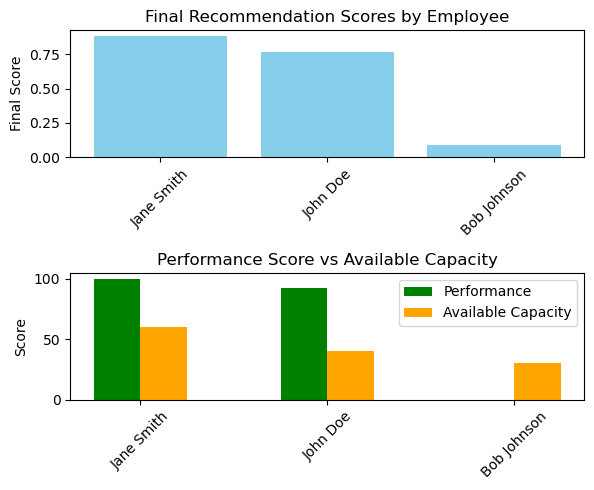

In [9]:
def plot_recommendations(recommendations_df):
    """Plot multiple aspects of the recommendations."""
    fig, axes = plt.subplots(2, 1, figsize=(6, 5))
    
    # Plot 1: Final Scores Comparison (using plt instead of sns)
    axes[0].bar(recommendations_df['name'], recommendations_df['final_score'], color='skyblue')
    axes[0].set_title('Final Recommendation Scores by Employee')
    axes[0].set_ylabel('Final Score')
    axes[0].set_xticks(range(len(recommendations_df['name'])))
    axes[0].set_xticklabels(recommendations_df['name'], rotation=45)
    
    # Plot 2: Performance vs Capacity
    width = 0.25
    x = np.arange(len(recommendations_df))
    
    axes[1].bar(x - width/2, recommendations_df['performance_score']*100, width, label='Performance', color='green')
    axes[1].bar(x + width/2, recommendations_df['available_capacity'], width, label='Available Capacity', color='orange')
    
    axes[1].set_title('Performance Score vs Available Capacity')
    axes[1].set_ylabel('Score')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(recommendations_df['name'], rotation=45)
    axes[1].legend()
    
    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

plot_recommendations(recommendations_df)


## 4. Visualize Project Type Similarities

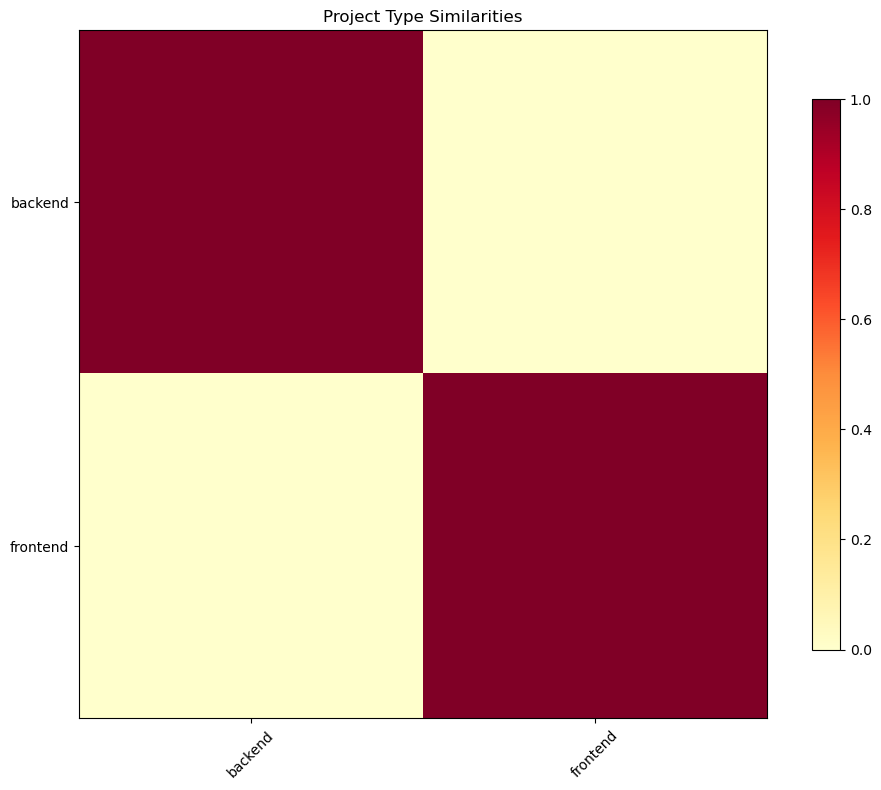

In [10]:
def plot_project_similarities(recommender):
    """Plot the similarity matrix between project types using Matplotlib."""
    # Create a new figure
    plt.figure(figsize=(10, 8))
    
    # Plot the heatmap using imshow (for matrix-like data)
    cax = plt.imshow(recommender.project_similarity_matrix, 
                     cmap='YlOrRd', 
                     interpolation='nearest', 
                     vmin=0, vmax=1)
    
    # Add a colorbar
    plt.colorbar(cax, shrink=0.8)
    
    # Set the title
    plt.title('Project Type Similarities')
    
    # Set x and y ticks (assuming recommender.project_similarity_matrix is a square matrix)
    tick_labels = recommender.project_similarity_matrix.columns  # Assuming these are the labels
    plt.xticks(np.arange(len(tick_labels)), tick_labels, rotation=45)
    plt.yticks(np.arange(len(tick_labels)), tick_labels)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

plot_project_similarities(recommender)

## 5. Analyze Employee Workload Distribution

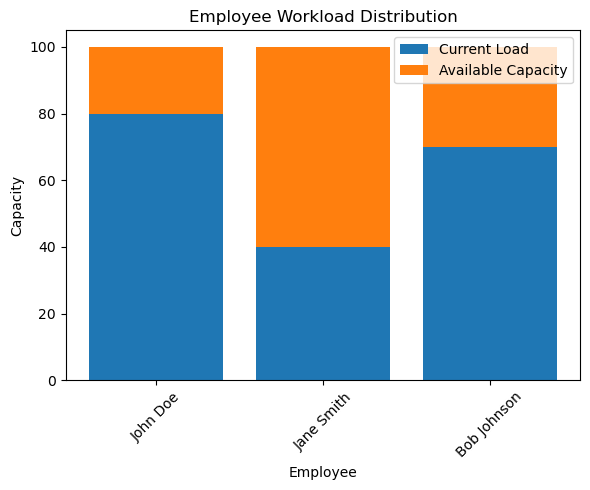

In [13]:
def plot_workload_distribution(recommender):
    """Plot the current workload distribution across employees."""
    workload_data = recommender.employees_df[['first_name', 'last_name', 'current_load', 'max_capacity']].copy()
    workload_data['name'] = workload_data['first_name'] + ' ' + workload_data['last_name']
    workload_data['available_capacity'] = workload_data['max_capacity'] - workload_data['current_load']
    
    plt.figure(figsize=(6, 5))
    
    # Create stacked bar chart
    plt.bar(workload_data['name'], workload_data['current_load'], label='Current Load')
    plt.bar(workload_data['name'], workload_data['available_capacity'], 
            bottom=workload_data['current_load'], label='Available Capacity')
    
    plt.title('Employee Workload Distribution')
    plt.xlabel('Employee')
    plt.ylabel('Capacity')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_workload_distribution(recommender)

## 6. Interactive Recommendation Updates

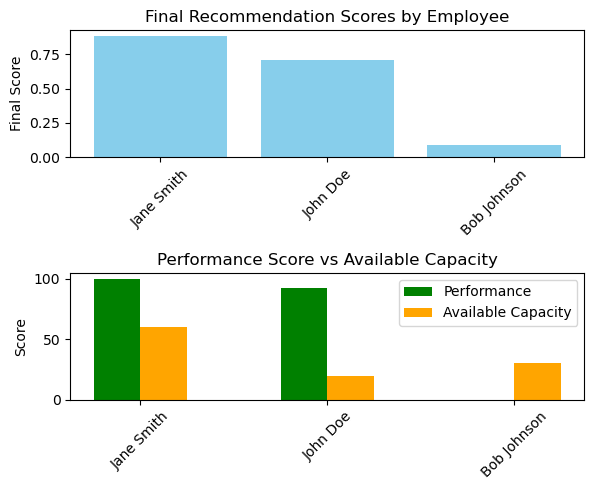

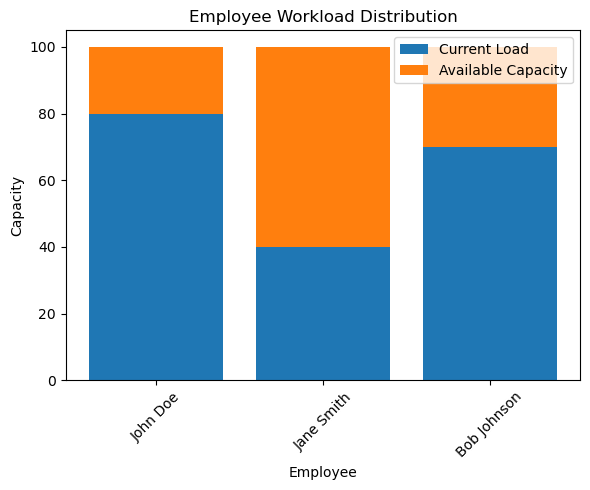

In [14]:
def update_and_visualize(employee_id, new_load):
    """Update an employee's load and visualize the new recommendations."""
    # Update the load
    recommender.update_employee_load(employee_id, new_load)
    
    # Get new recommendations
    new_recommendations = recommender.recommend_employees("backend", top_n=5)
    new_recommendations_df = pd.DataFrame(new_recommendations)
    
    # Plot new state
    plot_recommendations(new_recommendations_df)
    plot_workload_distribution(recommender)

# Example usage:
update_and_visualize(1, 80)

## 7. Load data from data.json and get recommendations

In [22]:
# Get the current working directory (assuming you're in the 'src' folder)
current_directory = os.getcwd()

# Navigate to the data directory (going one level up and then into 'data')
data_directory = os.path.join(current_directory, '..', 'data')

# Construct the path to the data.json file
data_file_path = os.path.join(data_directory, 'data.json')

# Load the data from the JSON file
with open(data_file_path, 'r') as f:
    data = json.load(f)

print(data)  # Print the loaded data to verify

{'data': [{'id': 707, 'first_name': 'Milan', 'last_name': 'Nováček', 'email': 'milan.novacek@atos.net', 'type': 'I', 'country': 'CZ', 'load': [{'number': 13, 'load': 475, 'timestamp': 1648425600}, {'number': 33, 'load': 400, 'timestamp': 1660521600}, {'number': 11, 'load': 100, 'timestamp': 1710115200}, {'number': 15, 'load': 100, 'timestamp': 1712534400}, {'number': 16, 'load': 100, 'timestamp': 1713139200}, {'number': 17, 'load': 100, 'timestamp': 1713744000}, {'number': 18, 'load': 100, 'timestamp': 1714348800}, {'number': 19, 'load': 100, 'timestamp': 1714953600}, {'number': 20, 'load': 100, 'timestamp': 1715558400}, {'number': 21, 'load': 100, 'timestamp': 1716163200}, {'number': 28, 'load': 100, 'timestamp': 1720396800}, {'number': 29, 'load': 100, 'timestamp': 1721001600}, {'number': 30, 'load': 100, 'timestamp': 1721606400}, {'number': 22, 'load': 100, 'timestamp': 1716768000}, {'number': 23, 'load': 100, 'timestamp': 1717372800}, {'number': 24, 'load': 100, 'timestamp': 171797

In [23]:
# Initialize recommender with new data
recommender = cosine_similarity_recommendation_system.EmployeeRecommender()
recommender.load_data(data)

# Now try getting recommendations for either "backend" or "frontend"
recommendations = recommender.recommend_employees("CP", top_n=3)
recommendations_df = pd.DataFrame(recommendations)
print(recommendations_df)

   employee_id             name  performance_score  available_capacity  \
0          628       Katie West           0.076317               -17.0   
1          709     Bogdan Danes           0.303024               -92.0   
2          714  Simple Employee           0.000718              -167.0   

   final_score similar_projects  
0    -0.584078             [CP]  
1    -3.237883             [CP]  
2    -6.261997             [CP]  


c:\Users\user\Desktop\recommendation system\src\model\cosine_similarity_recommendation_system.py:172: RuntimeWarning: divide by zero encountered in scalar divide
  final_score = performance * 0.7 + (available_capacity / employee['max_capacity']) * 0.3


In [25]:
recommendations = recommender.recommend_employees("CP", top_n=5)
recommendations_df = pd.DataFrame(recommendations)
recommendations_df

c:\Users\user\Desktop\recommendation system\src\model\cosine_similarity_recommendation_system.py:172: RuntimeWarning: divide by zero encountered in scalar divide
  final_score = performance * 0.7 + (available_capacity / employee['max_capacity']) * 0.3


,employee_id,name,performance_score,available_capacity,final_score,similar_projects
0,628,Katie West,0.076317,-17.0,-0.584078,[CP]
1,709,Bogdan Danes,0.303024,-92.0,-3.237883,[CP]
2,714,Simple Employee,0.000718,-167.0,-6.261997,[CP]
3,708,Dumitru Catalin,0.006529,-192.0,-7.195430,[CP]
4,750,Ioana-Codruta Miron,0.007136,-217.0,-8.132505,[CP]


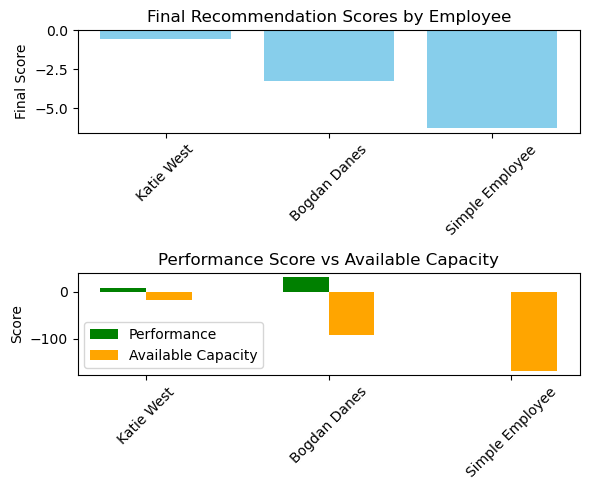

In [24]:
plot_recommendations(recommendations_df)